In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(512, 512)


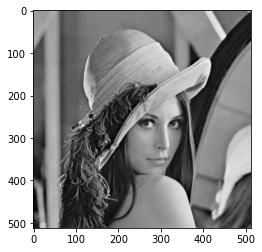

In [22]:
img = cv2.imread('Lenna.png',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img.shape)

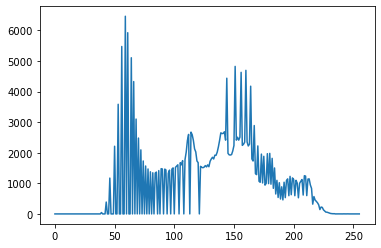

In [23]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [24]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

sum1=img.shape[0]*img.shape[1]
print(freq_arr)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   45    0    0
    0  388    0    0 1171    0    0    0 2211    0    0 3583    0    0
 5472    0    0 6460    0 5922    0    0 5104    0 4325    0 3100    0
 2479    0 2093    0 1730    0 1566    0 1469    0 1377    0 1345    0
 1335 1367    0 1416    0 1479 1468    0 1465 1438    0 1328 1431    0
 1465 1504    0 1522 1564 1605    0 1674 1604 1741    0 1774 2021 2398
 2598    0 2673 2588 2403 2126 2027 1730 1676    0 1554 1522 1510 1529
 1579 1536 1603 1542 1719 1795 1851 1796 1919 1916 2022 2198 2409 2650
 2626 2629 2685 2411 4435 1980 1930 1925 1939 2058 2237 4821 2411 2506
 2411 2507 4627 2240 2277 2346 4692 2352 2221 2278 4174 1798 1729 2888
 1316 1285 2222 1066 1035 1955 1012 1883  941  998 1969  990 1979  971
 1816  836 1502  651 1097  538 1020  487  886  458 1036  532 1093 1145
  595 

In [25]:
def backgroung(threshold):
    tot=tot1=tot3=Vb=Wb=Mb=0
    for i in range(threshold):
        tot=tot+freq_arr[i]
    Wb=tot/sum1
    if Wb==0:
        return 0
    for i in range(threshold):
        tot1=tot1+ i*freq_arr[i]
    Mb=tot1/tot
    for i in range(threshold):
        tot3=tot3+ (i-Mb)*(i-Mb)*freq_arr[i]
    Vb=tot3/tot
    return Vb*Wb



In [26]:
def foregroung(threshold):
    tot=tot1=tot3=Vf=Wf=Mf=0
    for i in range(threshold,256):
        tot=tot+freq_arr[i]
    Wf=tot/sum1
    if Wf==0:
        return 0
    for i in range(threshold,256):
        tot1=tot1+ i*freq_arr[i]
    Mf=tot1/tot
    for i in range(threshold,256):
        tot3=tot3+ (i-Mf)*(i-Mf)*freq_arr[i]
    Vf=tot3/tot
    return Vf*Wf


In [27]:
Variance=np.zeros(256,'float64')
for i in range (256):
    Variance[i]=foregroung(i)+backgroung(i)

print(Variance)

[2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2016.1985715  2016.1985715  2016.1985715  2016.1985715  2016.1985715
 2014.69994053 2014.69994053 2014.69994053 2014.69994053 2002.84386307
 2002.84386307 2002.84386307 1969.22544533 1969.22544533 1969.22544533
 1969.22544533 1910.75952373 1910.75952373 1910.75952373 1820.73118579
 1820.73118579 1820.73118579 1688.61501425 1688.61501425 1688.61501425
 1537.14545439 1537.14545439 1398.35258709 1398.35258709 1398.35258709
 1282.73023432 1282.73023432 1186.05966183 1186.05966183 1118.34880152
 1118.34880152

In [28]:
print(np.argmin(Variance))
threshold_value=np.argmin(Variance)

125


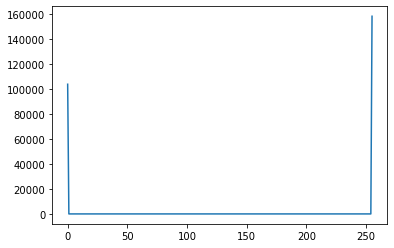

In [29]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j]<threshold_value:
            new_img[i][j]=0
        else:
            new_img[i][j]=255

hist = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

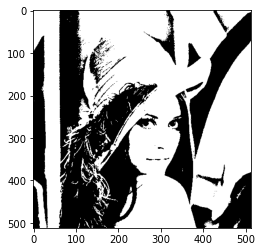

In [30]:
plt.imshow(new_img,'gray')